In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sns.set_theme()

# jupyter notebook full-width display
from IPython.core.display import display, HTML
display(HTML(""))

# pandas formatting
pd.set_option('display.float_format', '{:.3f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [2]:
# import cleaned data
df_FD = pd.read_pickle('cleaned_MASTER_dataset.pickle')  # fish details
df_LF = pd.read_pickle('cleaned_LENGTHFREQ_dataset.pickle')  # length frequencies
df_SD = pd.read_pickle('cleaned_LOGBOOK_dataset.pickle')  # logbook / sample data

# import formatted and cleaned data
gaspereau_lengthfrequency = pd.read_pickle('gaspereau_lengthfrequency.pickle')
gaspereau_fishdetails = pd.read_pickle('gaspereau_fishdetails.pickle')
gaspereau_sample = pd.read_pickle('gaspereau_sample.pickle')

# most recent year

In [16]:
# most recent year of data - length frequency
gaspereau_lengthfrequency[gaspereau_lengthfrequency.sample_id < 2023000000].sample_id.max() // 1000000

2019

In [21]:
# most recent year of data - fish details
gaspereau_fishdetails.DATETIME.dt.year.max()

2019

In [24]:
# most recent year of data - sample
gaspereau_sample.sample_date.dt.year.max()

2019.0

# length frequencies look good

----------------------------------------------
Histogram: 2007051705


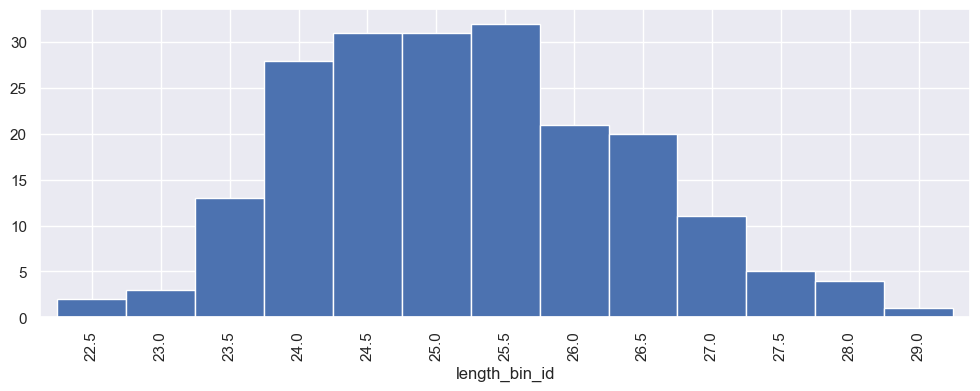

In [35]:
# random samples - length frequencies

for i in range(1):
    sample_id = np.random.choice(gaspereau_lengthfrequency.sample_id.unique())
    print('----------------------------------------------\nHistogram:', sample_id)
    gaspereau_lengthfrequency.loc[gaspereau_lengthfrequency.sample_id==sample_id, ['count', 'length_bin_id']].plot(
        kind='bar', x='length_bin_id', y='count', width=1, figsize=(12,4), legend=False
    )
    plt.show()

# fields comparison - gaspereau fields

In [36]:
# fish details 
sorted(list(gaspereau_fishdetails.columns))

['AGE_1',
 'AGE_2',
 'AGE_COMMENTS_1',
 'AGE_COMMENTS_2',
 'AGE_NOTES',
 'AGING_PERSON_1',
 'AGING_PERSON_2',
 'CONDITION',
 'DATETIME',
 'ENVELOP COMMENTS',
 'FL_FROZEN',
 'FL_WET',
 'FSP_1',
 'FSP_2',
 'FSP_NOTES',
 'SEX',
 'SITE',
 'SPECIES',
 'fish_length',
 'fish_number',
 'fish_weight',
 'gonad_weight',
 'maturity_id',
 'sample_id']

In [37]:
# sample
sorted(list(gaspereau_sample.columns))

['BYCATCH_OTHER',
 'BYCATCH_SBASS',
 'BYCATCH_SHAD',
 'CODE',
 'COMMENTS',
 'HOURS_FISHED',
 'LAST_NAME',
 'NO_NETS',
 'SAMPLER',
 'SITE',
 'ZONE',
 'catch_weight_lbs',
 'district_id',
 'fishing_area_id',
 'gear_id',
 'id',
 'sample_date',
 'sample_weight_lbs']